In [1]:
#Importing the relevant libraries for the analysis 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import math 
import re 

In [2]:
#Reading the dataset 
amazon_sales = pd.read_csv('amazon.csv')

In [40]:
#Checking the first 5 values of the dataset
amazon_sales.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [5]:
#Shape of the dataset total columns and rows 
amazon_sales.shape

(1465, 16)

In [8]:
#Looking at the different column names in the dataset
amazon_sales.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [13]:
#Looking at the datatypes and relevant information about the dataset
amazon_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1465 non-null   object 
 7   rating_count         1463 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

In [4]:
#Dropping rows that have duplicates for better data analysis
amazon_sales.drop_duplicates()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the me

In [41]:
#Removing characters in price columns and changing data types of columns to float64
char_remove = [',','₹','%']
new_columns = ['discounted_price','actual_price','discount_percentage', 'rating_count']
for chr in char_remove: 
    for cl in new_columns: 
        amazon_sales[cl] = amazon_sales[cl].str.replace(chr,'') 
        
for cl in new_columns: 
    amazon_sales[cl] = amazon_sales[cl].astype('float64')

In [6]:
amazon_sales.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64.0,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43.0,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90.0,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53.0,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61.0,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [7]:
#Checking if the datatypes changed values 
amazon_sales[new_columns].dtypes

discounted_price       float64
actual_price           float64
discount_percentage    float64
rating_count           float64
dtype: object

In [42]:
#Changing the rating values 
amazon_sales[amazon_sales['rating'].str.contains('|',regex=False)]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1279,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",2099.0,2499.0,16.0,|,992.0,No Installation is provided for this product|1...,"AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...","Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...","R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...","Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...


In [43]:
#Replacing and changing rating values to verify change has occured 
amazon_sales['rating'] = amazon_sales['rating'].str.replace('|','4').astype('float64')

In [44]:
#Checking the datatype
amazon_sales['rating'].dtype

dtype('float64')

In [45]:
#Applying formating changes on category column that has '|' and fixing formatting of & symbol in column 
amazon_sales['category'] = amazon_sales.category.apply(lambda x:x.split('|')[0].replace('&',' & '))
amazon_sales['category'].value_counts()

category
Electronics                526
Computers & Accessories    453
Home & Kitchen             448
OfficeProducts              31
MusicalInstruments           2
HomeImprovement              2
Toys & Games                 1
Car & Motorbike              1
Health & PersonalCare        1
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='category'>

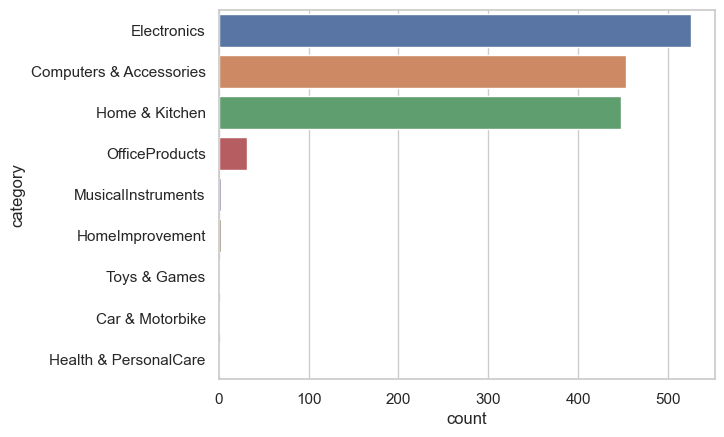

In [49]:
#Using countplot to show the highest and lowest values of different categories in the dataset
sns.countplot(data = amazon_sales, y='category', order=amazon_sales['category'].value_counts().index)

<Axes: title={'center': 'Most Popular Products in Demand in Price Range'}, xlabel='actual_price', ylabel='category'>

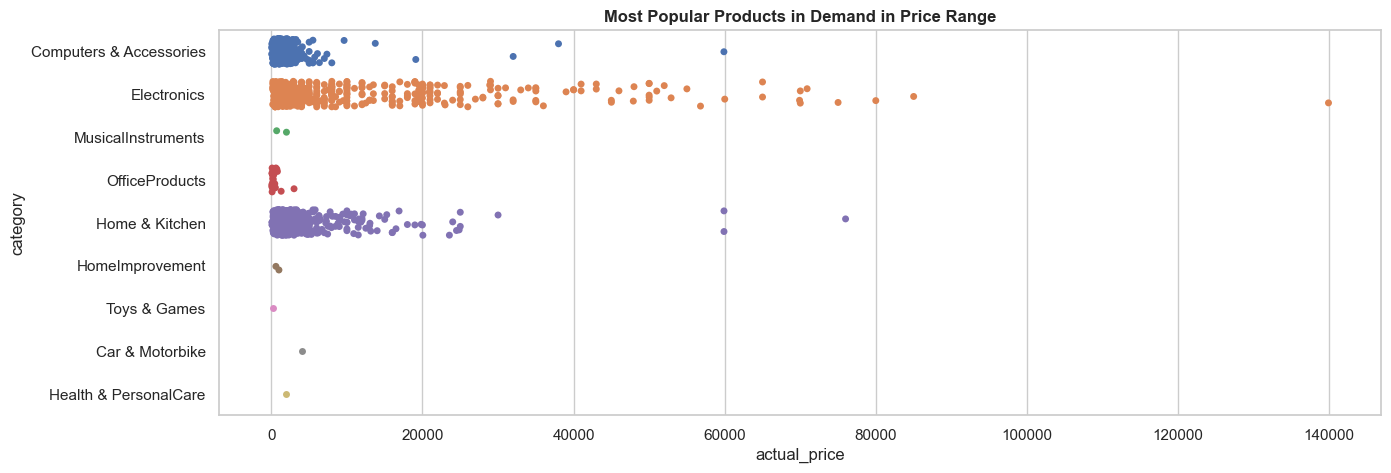

In [48]:
#Graph indicating the most popular products in demand based on price range
#Based on the data electronic and home kitchen products are high in demand
fig, ax = plt.subplots(figsize = (15,5))
sns.set(style = 'whitegrid')  
ax.set_title('Most Popular Products in Demand in Price Range', fontweight='bold')
sns.stripplot(ax =ax, data = amazon_sales, y = 'category', x= 'actual_price',hue="category", jitter =0.3,legend=False)

<Axes: title={'center': 'Highest Ratings of Products In Categories'}, xlabel='rating', ylabel='category'>

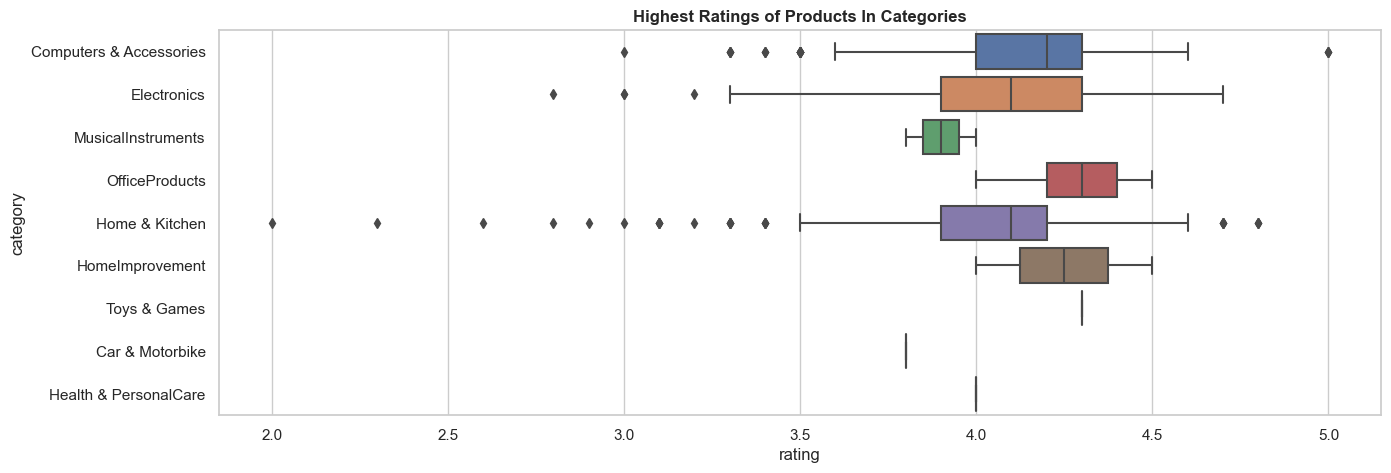

In [111]:
#Boxplot to show the highest ratings of products in each different category 
#Data shows that Electronics and Home & Kitchen products have high ratings 
fig, ax = plt.subplots(figsize=(15, 5))
sns.set(style = 'whitegrid', palette="pastel")  
sns.set_theme(style='darkgrid', palette='deep', font='sans-serif', font_scale=1)
ax.set_title('Highest Ratings of Products In Categories', fontweight='bold')
sns.boxplot(ax =ax, data = amazon_sales, y = 'category', x= 'rating')

[Text(0, 0, '0.0%'),
 Text(0, 0, '0.0%'),
 Text(0, 0, '46.0%'),
 Text(0, 0, '42.0%'),
 Text(0, 0, '50.0%'),
 Text(0, 0, '53.0%'),
 Text(0, 0, '57.5%'),
 Text(0, 0, '60.0%'),
 Text(0, 0, '60.0%')]

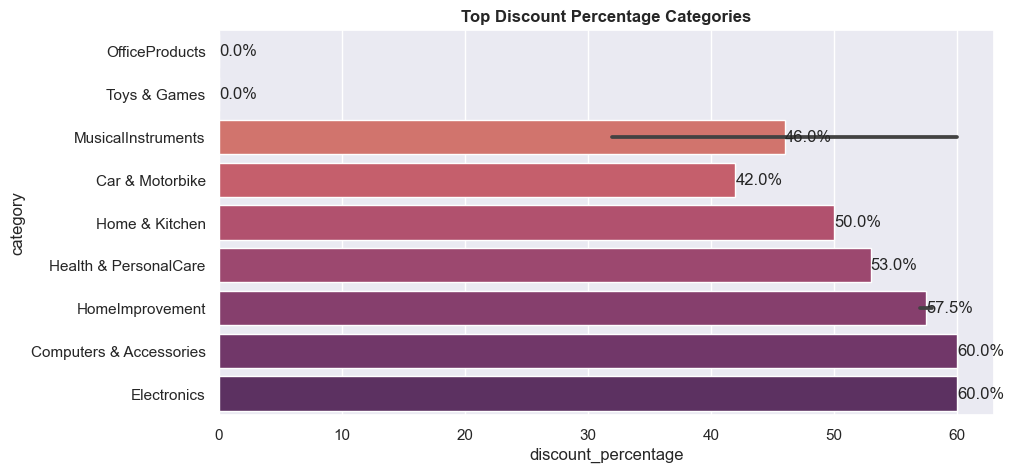

In [112]:
#Graph with barplot to show which categories have the highest discount in terms of percentages
fig, ax = plt.subplots(figsize=(10, 5))
sns.set(style = 'whitegrid')  
discount_percentage = amazon_sales.groupby('category')['discount_percentage'].apply(lambda x: x.mode()).sort_values(ascending = True).reset_index()
ax.set_title('Top Discount Percentage Categories',fontweight='bold')
sns.barplot(ax=ax,data = discount_percentage, y=discount_percentage.category,  x = discount_percentage.discount_percentage,palette='flare')
ax.bar_label(ax.containers[0],fmt='%.1f%%')

In [50]:
#Intializing a new variable to hold computer acessories ratings 
computer_accessories=amazon_sales.copy()
computer_accessories.drop(computer_accessories[computer_accessories['category'] != 'Computers & Accessories'].index, inplace = True)

The average rating for Electronic Items is: 4.154966887417218


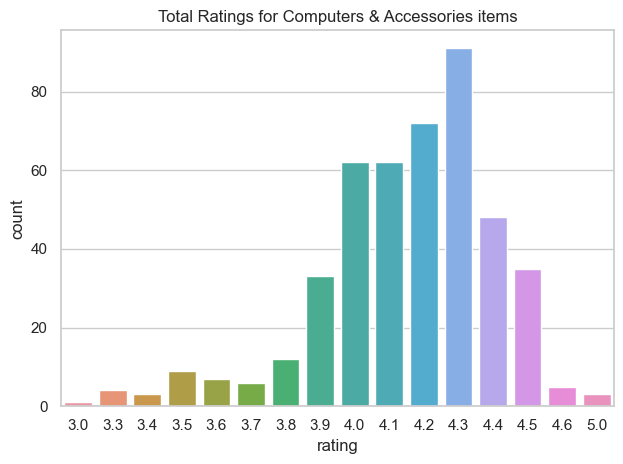

In [65]:
#Graph to indicate which Computers & Accessories have the highest ratings 
#Getting the mean shows that the average rating was approx. 4.15
sns.countplot(data=computer_accessories, x='rating').set(title='Total Ratings for Computers & Accessories items')
plt.tight_layout()
average_rating_comp = computer_accessories['rating'].mean()
print("The average rating for Electronic Items is: " +  average_rating_comp.astype(str))

In [52]:
electronic_data = amazon_sales.copy()
electronic_data.drop(electronic_data[electronic_data['category']!= 'Electronics'].index, inplace = True)

The average rating for Electronic Items is: 4.081749049429658


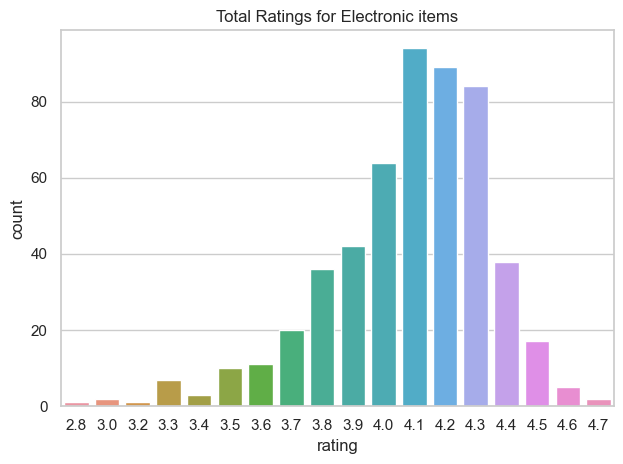

In [64]:
#Graph to indicate which Electronic items have the highest ratings 
#Getting the mean shows that the average rating was approx. 4.08
sns.countplot(data=electronic_data, x='rating').set(title='Total Ratings for Electronic items')
plt.tight_layout()
average_rating_Elec = electronic_data['rating'].mean()

print("The average rating for Electronic Items is: " +  average_rating_Elec.astype(str))

In [54]:
home_kitchen_data=amazon_sales.copy()
home_kitchen_data.drop(home_kitchen_data[home_kitchen_data['category'] != 'Home & Kitchen'].index, inplace = True)

The average rating for Home & Kitchen items is: 4.040625


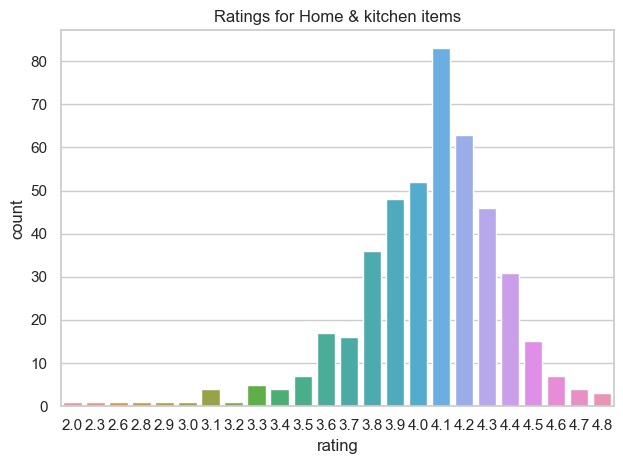

In [55]:
#Graph to indicate which Home & kitchen items have the highest ratings 
#Getting the mean shows that the average rating was approx. 4.04
sns.countplot(data=home_kitchen_data, x='rating').set(title='Ratings for Home & kitchen items')
plt.tight_layout()
rating_mean_HK = home_kitchen_data['rating'].mean()
rating_mean_HK
print("The average rating for Home & Kitchen items is: " +  rating_mean_HK.astype(str))

In [56]:
#Calculating sales with discounted price multiply by the rating count 
amazon_sales['sales'] = amazon_sales.discounted_price * amazon_sales.rating_count

In [57]:
#Intializing variable for total_sales, grouping sales sum and sorting the values by ascending 
total_sales = amazon_sales.groupby('category')['sales'].sum().sort_values(ascending = True)

In [58]:
amazon_sales.sales.head()

0     9683331.0
1     8754806.0
2     1577672.0
3    31045427.0
4     2603370.0
Name: sales, dtype: float64

In [59]:
#Different numerical formats used for the value converter function 
numerical_values = ['',' Thousand',' Million',' Billion',' Trillion']

In [60]:
#Value converter function using math library to convert billions into a readible format 
def value_converter(x):
    x = float(x)
    valuex = max(0,min(len(numerical_values)-1,
                        int(math.floor(0 if x == 0 else math.log10(abs(x))/3))))

    return '{:.0f}{}'.format(x / 10**(3 * valuex), numerical_values[valuex ])

In [61]:
#Intializing new values into a list and calling the function created above
new_values = []
for y in total_sales.values: 
    new_values.append(value_converter(y))
    print(value_converter(y))

2 Million
3 Million
3 Million
3 Million
46 Million
64 Million
6 Billion
6 Billion
59 Billion


[Text(3, 0, '2 Million'),
 Text(3, 0, '3 Million'),
 Text(3, 0, '3 Million'),
 Text(3, 0, '3 Million'),
 Text(3, 0, '46 Million'),
 Text(3, 0, '64 Million'),
 Text(3, 0, '6 Billion'),
 Text(3, 0, '6 Billion'),
 Text(3, 0, '59 Billion')]

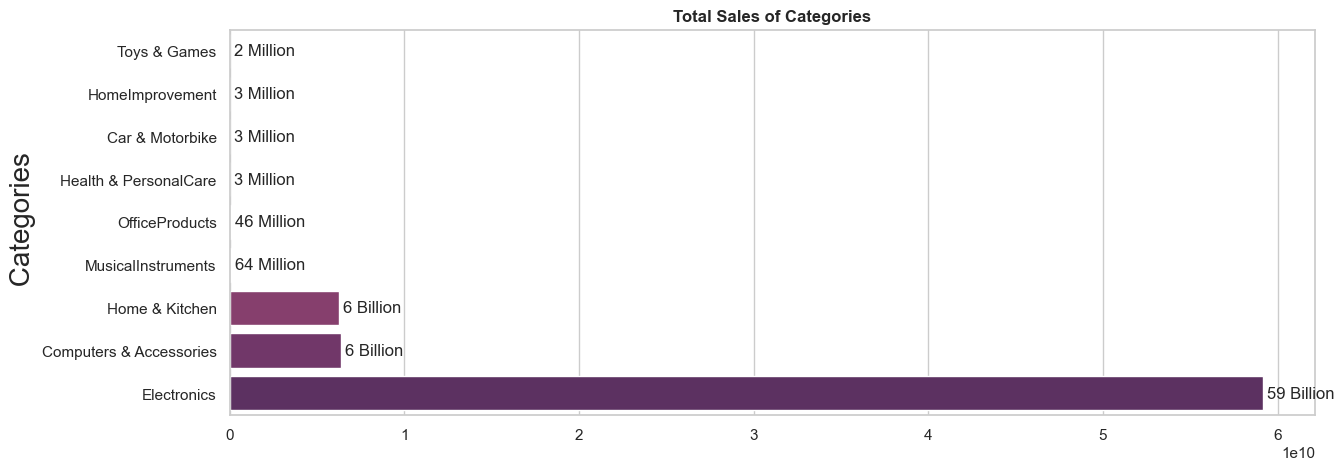

In [62]:
#Graph to show the total sales in different categories based on the dataset
fig, ax = plt.subplots(figsize=(14, 5))
ax.set_title('Total Sales of Categories',fontweight='bold' )
sns.barplot(ax= ax,y =total_sales.index,x =total_sales.values,palette='flare')
ax.set_ylabel(' Categories', fontsize = 20)
ax.bar_label(ax.containers[0],labels = new_values,padding=3)

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


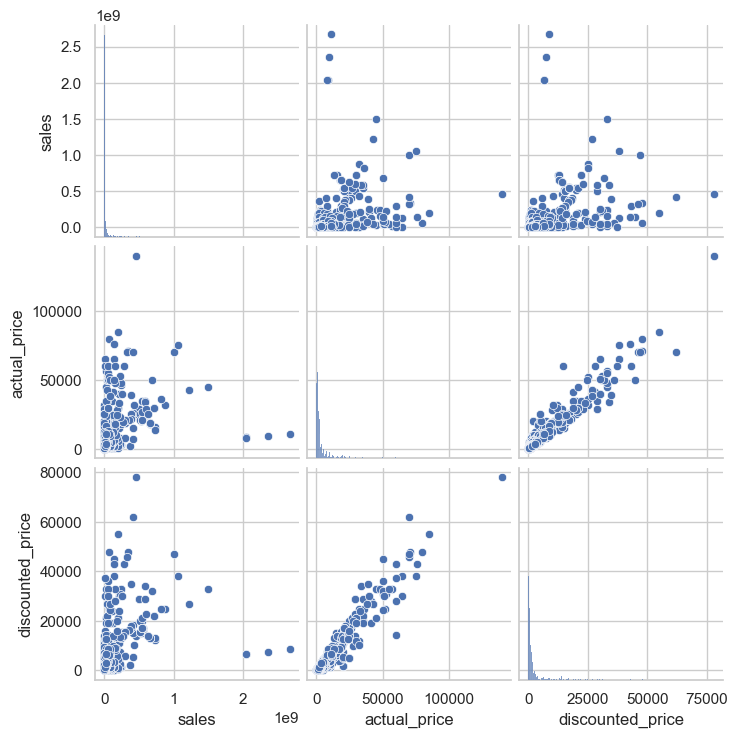

In [63]:
#Pairplot to indicate which sales and prices are relevant to each other
sns.pairplot(data=amazon_sales, vars = ['sales','actual_price','discounted_price'])
plt.show()